In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
data = pd.read_csv("data_company22.csv",index_col=0, header=0, thousands=',',encoding='cp949')

In [3]:
data

,매출액,EBIT,Op.EBIT,EBITDA,금융비용,순금융비용,세전계속사업이익,당기순이익,자산총계,부채총계,...,기타.2,순영업활동현금흐름(NCF).2,자본적지출.2,잉여현금흐름(FCF).2,영업자산의처분.2,투자자산의처분(net).2,기타(net).2,내부순현금흐름(ICF).2,재무적가용현금흐름(ACF).2,건전성 여부
ENS,36576.0,-8581.0,-9097.0,-8234.0,581.0,580.0,-5249.0,-5249.0,36623.0,32283.0,...,1155.0,434.0,39.0,396.0,3.0,12.0,47.0,457.0,439.0,부실
JBM,13967.0,311.0,281.0,791.0,291.0,287.0,82.0,82.0,12384.0,11020.0,...,-97.0,906.0,607.0,299.0,13.0,-59.0,14.0,267.0,272.0,부실
경안전선,129485.0,5140.0,5278.0,5720.0,5067.0,2722.0,2874.0,2235.0,151767.0,98347.0,...,-4538.0,2923.0,4410.0,-1628.0,NaN,-896.0,-608.0,-3132.0,-3132.0,부실
경은,61307.0,1838.0,1768.0,3160.0,754.0,746.0,1024.0,809.0,41525.0,36050.0,...,754.0,-4840.0,172.0,-5012.0,23.0,-37831.0,-13.0,-42832.0,-41352.0,부실
광산,23262.0,-6827.0,-6253.0,-6126.0,2399.0,2380.0,-9634.0,-9634.0,50510.0,52861.0,...,167.0,-9158.0,2.0,-9160.0,NaN,610.0,389.0,-8161.0,-361.0,부실
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
주식회사 화인폼,7783.0,699.0,705.0,1907.0,291.0,290.0,419.0,358.0,14007.0,7733.0,...,0.0,2586.0,2631.0,-46.0,13.0,-52.0,-2.0,-87.0,-87.0,건전
원시스템,14365.0,334.0,122.0,786.0,356.0,335.0,-234.0,48.0,20183.0,15747.0,...,22.0,-442.0,11.0,-453.0,NaN,-4.0,71.0,-385.0,178.0,건전
석정개발,18321.0,148.0,301.0,1586.0,15.0,7.0,252.0,145.0,11105.0,9548.0,...,1667.0,-313.0,2531.0,-2843.0,339.0,22.0,29.0,-2453.0,-2452.0,건전
파나소닉이에스신동아주식회사,68075.0,5184.0,5191.0,7369.0,NaN,-67.0,5181.0,4120.0,41346.0,10035.0,...,562.0,2880.0,1866.0,-268.0,0.0,88.0,-198.0,-378.0,-378.0,건전


In [4]:
# 결측치 처리-보간법 이용
data = data.interpolate()
# 나머지 결측치-0으로 채워넣음
data = data.fillna(0)

In [5]:
np.save("data_company.npy",arr = data)
data = np.load("data_company.npy", allow_pickle=True)

In [6]:
# integer변환
x = data[0:,0:-1].astype('int64')
y = data[0:,-1]

# y분류 LabelEncoder로 숫자로 변경(0-건전, 1-부실)
encoder=LabelEncoder()
encoder.fit(y)
y_encode = encoder.transform(y)

In [7]:
print("x:",x)
print("y:",y_encode)

print("x.shape:",x.shape) #(150,135)
print("y.shape:",y.shape) #(150,)

x: [[ 36576  -8581  -9097 ...     47    457    439]
 [ 13967    311    281 ...     14    267    272]
 [129485   5140   5278 ...   -608  -3132  -3132]
 ...
 [ 18321    148    301 ...     29  -2453  -2452]
 [ 68075   5184   5191 ...   -198   -378   -378]
 [ 34259    711    164 ...   -198   -194   -194]]
y: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
x.shape: (139, 119)
y.shape: (139,)


In [8]:
#1. 데이터
x_train,x_test,y_train,y_test=train_test_split(x,y_encode,test_size=0.3,random_state=60)

print(x_train.shape)
print(x_test.shape)
print(y_train)

(97, 119)
(42, 119)
[1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1
 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0]


In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
#2. 모델
model = XGBClassifier(n_estimators=1000)
#3. 훈련, 평가예측
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc = model.score(x_test,y_test)
print("acc:",acc)

acc: 0.8095238095238095


In [11]:
feature_importances_ = model.feature_importances_

In [12]:
data = pd.read_csv("data_company22.csv",index_col=0, header=0, thousands=',',encoding='cp949')
index = data.iloc[:,:-1].columns

In [34]:
pd.DataFrame(index)[:40]

,0
0,매출액
1,EBIT
2,Op.EBIT
3,EBITDA
4,금융비용
5,순금융비용
6,세전계속사업이익
7,당기순이익
8,자산총계
9,부채총계


In [13]:
feature_importances = pd.DataFrame({'xgb_feature_importance':feature_importances_}, index=index)
feature_importances = feature_importances.sort_values(by=['xgb_feature_importance'],ascending=False)
feature_importances

,xgb_feature_importance
자본총계.2,0.121704
순영업활동현금흐름(NCF),0.075309
매출액,0.070463
금융비용,0.070209
비현금항목 조정.1,0.058706
...,...
EBITDA.1,0.000000
재고자산의 증감,0.000000
매입채무 등의 증감,0.000000
기타,0.000000


Text(0, 0.5, '상관관계')

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52509 mi

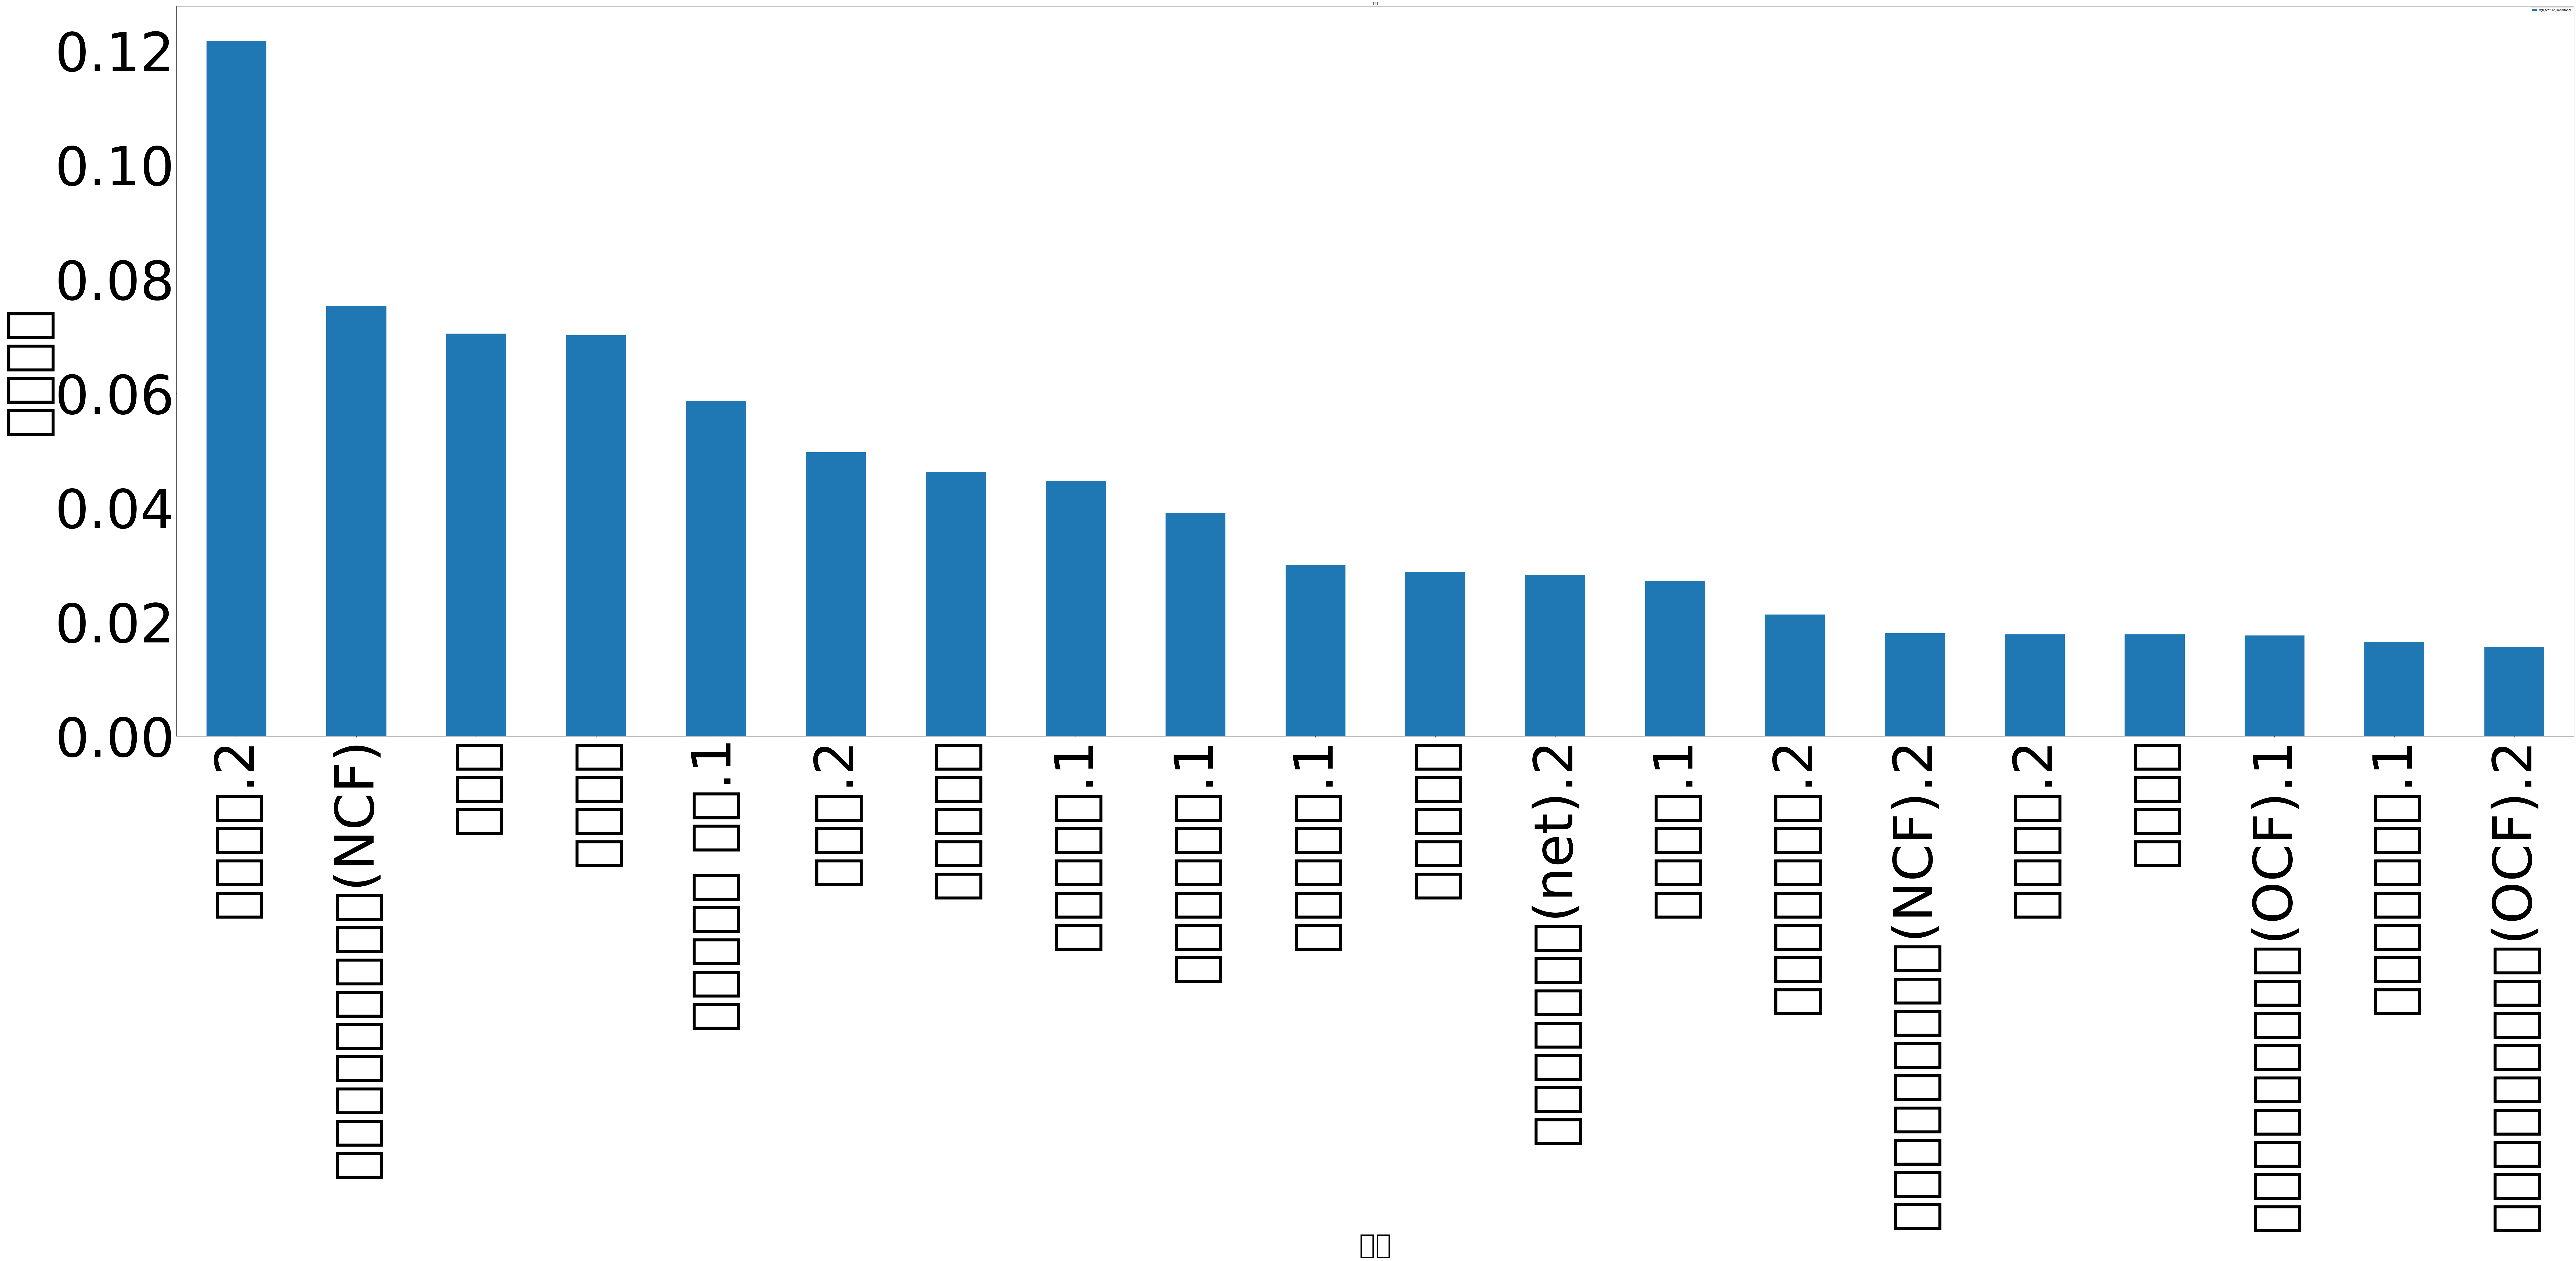

In [14]:
ax = feature_importances[:20].plot(kind='bar', title='상관관계', figsize=(160,50), 
            legend=True, fontsize=200)
ax.set_xlabel('변수', fontsize=100)        
ax.set_ylabel('상관관계', fontsize=200) 

In [15]:
feature_importances[:20]

,xgb_feature_importance
자본총계.2,0.121704
순영업활동현금흐름(NCF),0.075309
매출액,0.070463
금융비용,0.070209
비현금항목 조정.1,0.058706
매출액.2,0.049720
현금성자산,0.046260
현금성자산.1,0.044710
운전자본투자.1,0.039084
순금융비용.1,0.029903


In [16]:
data = pd.read_csv("data_company22.csv",index_col=0, header=0, thousands=',',encoding='cp949')

In [17]:
data['건전성 여부'] = data['건전성 여부'].replace('부실',1).replace('건전',0)

In [18]:
data

,매출액,EBIT,Op.EBIT,EBITDA,금융비용,순금융비용,세전계속사업이익,당기순이익,자산총계,부채총계,...,기타.2,순영업활동현금흐름(NCF).2,자본적지출.2,잉여현금흐름(FCF).2,영업자산의처분.2,투자자산의처분(net).2,기타(net).2,내부순현금흐름(ICF).2,재무적가용현금흐름(ACF).2,건전성 여부
ENS,36576.0,-8581.0,-9097.0,-8234.0,581.0,580.0,-5249.0,-5249.0,36623.0,32283.0,...,1155.0,434.0,39.0,396.0,3.0,12.0,47.0,457.0,439.0,1
JBM,13967.0,311.0,281.0,791.0,291.0,287.0,82.0,82.0,12384.0,11020.0,...,-97.0,906.0,607.0,299.0,13.0,-59.0,14.0,267.0,272.0,1
경안전선,129485.0,5140.0,5278.0,5720.0,5067.0,2722.0,2874.0,2235.0,151767.0,98347.0,...,-4538.0,2923.0,4410.0,-1628.0,NaN,-896.0,-608.0,-3132.0,-3132.0,1
경은,61307.0,1838.0,1768.0,3160.0,754.0,746.0,1024.0,809.0,41525.0,36050.0,...,754.0,-4840.0,172.0,-5012.0,23.0,-37831.0,-13.0,-42832.0,-41352.0,1
광산,23262.0,-6827.0,-6253.0,-6126.0,2399.0,2380.0,-9634.0,-9634.0,50510.0,52861.0,...,167.0,-9158.0,2.0,-9160.0,NaN,610.0,389.0,-8161.0,-361.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
주식회사 화인폼,7783.0,699.0,705.0,1907.0,291.0,290.0,419.0,358.0,14007.0,7733.0,...,0.0,2586.0,2631.0,-46.0,13.0,-52.0,-2.0,-87.0,-87.0,0
원시스템,14365.0,334.0,122.0,786.0,356.0,335.0,-234.0,48.0,20183.0,15747.0,...,22.0,-442.0,11.0,-453.0,NaN,-4.0,71.0,-385.0,178.0,0
석정개발,18321.0,148.0,301.0,1586.0,15.0,7.0,252.0,145.0,11105.0,9548.0,...,1667.0,-313.0,2531.0,-2843.0,339.0,22.0,29.0,-2453.0,-2452.0,0
파나소닉이에스신동아주식회사,68075.0,5184.0,5191.0,7369.0,NaN,-67.0,5181.0,4120.0,41346.0,10035.0,...,562.0,2880.0,1866.0,-268.0,0.0,88.0,-198.0,-378.0,-378.0,0


In [19]:
corr = data.corr()
corr

,매출액,EBIT,Op.EBIT,EBITDA,금융비용,순금융비용,세전계속사업이익,당기순이익,자산총계,부채총계,...,기타.2,순영업활동현금흐름(NCF).2,자본적지출.2,잉여현금흐름(FCF).2,영업자산의처분.2,투자자산의처분(net).2,기타(net).2,내부순현금흐름(ICF).2,재무적가용현금흐름(ACF).2,건전성 여부
매출액,1.000000,0.568198,0.555779,0.657868,0.436216,0.355926,0.438682,0.339925,0.384348,0.388866,...,-0.013309,0.242580,0.472354,0.031723,-0.041038,0.133886,-0.611062,0.095982,0.191379,-0.184360
EBIT,0.568198,1.000000,0.976120,0.956575,-0.092168,-0.166404,0.924618,0.892354,0.324270,0.124522,...,-0.073268,0.729716,0.245941,0.508895,-0.403800,-0.072474,-0.228837,0.233116,-0.258429,-0.309833
Op.EBIT,0.555779,0.976120,1.000000,0.936203,-0.079079,-0.151019,0.960162,0.925745,0.335806,0.158074,...,-0.040714,0.658996,0.232053,0.452071,-0.396831,-0.091945,-0.253017,0.170447,-0.305212,-0.311454
EBITDA,0.657868,0.956575,0.936203,1.000000,0.075788,-0.006821,0.862642,0.815137,0.421568,0.234292,...,-0.073248,0.698301,0.419085,0.437860,-0.389310,-0.011813,-0.256085,0.233873,-0.161978,-0.335005
금융비용,0.436216,-0.092168,-0.079079,0.075788,1.000000,0.958130,-0.239689,-0.328437,0.753235,0.751934,...,-0.110790,-0.411117,0.334084,-0.510736,0.142940,0.188398,-0.127221,-0.213697,0.292610,0.008855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
투자자산의처분(net).2,0.133886,-0.072474,-0.091945,-0.011813,0.188398,0.194632,-0.019147,-0.014697,0.098268,0.027421,...,0.110929,-0.067174,0.320823,-0.222558,0.050730,1.000000,-0.012395,0.720360,0.784897,-0.015565
기타(net).2,-0.611062,-0.228837,-0.253017,-0.256085,-0.127221,-0.096744,-0.232449,-0.228903,-0.266145,-0.264097,...,-0.095901,-0.234895,-0.471302,-0.085941,-0.152962,-0.012395,1.000000,-0.021466,0.032208,0.115079
내부순현금흐름(ICF).2,0.095982,0.233116,0.170447,0.233873,-0.213697,-0.167514,0.238067,0.250148,-0.090199,-0.174629,...,0.057108,0.416595,0.166460,0.534636,0.111285,0.720360,-0.021466,1.000000,0.649778,0.003742
재무적가용현금흐름(ACF).2,0.191379,-0.258429,-0.305212,-0.161978,0.292610,0.296806,-0.253921,-0.299995,0.039501,0.001463,...,0.107718,-0.099485,0.110700,-0.060769,0.282775,0.784897,0.032208,0.649778,1.000000,0.059276


In [20]:
Survived = corr.loc[:,['건전성 여부']]
Survived = abs(Survived)
a = Survived.sort_values(by=['건전성 여부'],
                              ascending=False)
a = a[2:]
a

,건전성 여부
총영업활동현금흐름(OCF).1,0.414318
현금성자산.1,0.383129
현금성자산.2,0.370028
현금성자산,0.365346
EBITDA.2,0.355322
...,...
순차입금.1,0.010839
금융비용.2,0.009324
금융비용,0.008855
비현금항목 조정.1,0.008548


In [21]:
a[:30]

,건전성 여부
총영업활동현금흐름(OCF).1,0.414318
현금성자산.1,0.383129
현금성자산.2,0.370028
현금성자산,0.365346
EBITDA.2,0.355322
EBITDA.3,0.354249
총영업활동현금흐름(OCF),0.352429
EBITDA.1,0.339167
EBITDA.4,0.336276
EBITDA,0.335005
